In [2]:
%matplotlib inline
%cd /users/jburba/data/shared/HERA_IDR2.2/2458101/

import numpy as np
import os, sys, glob

from pyuvdata import UVData
from matplotlib.pyplot import *

rcParams.update({'font.size': 16, 'figure.figsize':(12, 8)})

/gpfs/data/jpober/shared/HERA_IDR2.2/2458101


In [3]:
def waterfall_column(waterfalls, flags, titles, clims=None, clabels=None, cmaps=None, ylims=None, 
                     ylabel='JD - 2458098', extents=None, hspace=.1, figsize=(12,6), dpi=100, fignum=None):
    '''Useful plotting function for the IDR 2.2 memo.'''
    if clims is None:
        clims = [None for i in range(len(waterfalls))]
    if clabels is None:
        clabels = [None for i in range(len(waterfalls))]
    if cmaps is None:
        cmaps = [None for i in range(len(waterfalls))]
    if ylims is None:
        ylims = [None for i in range(len(waterfalls))]
    if not any(isinstance(ex, list) for ex in extents):
        extents = [extents for i in range(len(waterfalls))]
    if fignum is None:
        fig, axes = subplots(len(waterfalls), 1, sharex=True, squeeze=True, figsize=figsize, dpi=dpi)
    else:
        fig, axes = subplots(len(waterfalls), 1, sharex=True, squeeze=True, figsize=figsize, dpi=dpi, num=fignum)
    subplots_adjust(hspace=hspace)
    for ax, wf, f, t, clim, clabel, cmap, ylim, ex in zip(axes, waterfalls, flags, titles,
                                                          clims, clabels, cmaps, ylims, extents):
        with np.errstate(divide='ignore', invalid='ignore'):
            im = ax.imshow(wf / ~f, aspect='auto', extent=ex, cmap=cmap)
        colorbar(im, ax=ax, label=clabel, aspect=8, pad=.025)
        if ax == axes[-1]:
            ax.set_xlabel('Frequency (MHz)')    
        im.set_clim(clim)
        ax.set_ylabel(ylabel)
        ax.set_ylim(ylim)
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        ax.text(0.02, 0.9, t, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

In [4]:
len(glob.glob('zen.2458101.?????.HH.OCRS.uvh5'))

73

In [13]:
uvd = UVData()
uvd.read('zen.2458101.31939.HH.OCRS.uvh5')

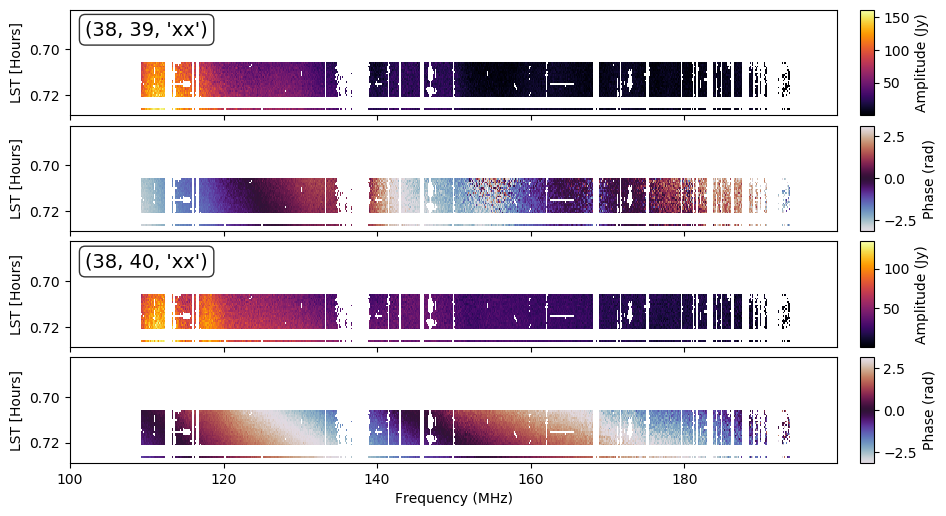

In [14]:
bl1, bl2 = (38, 39, 'xx'), (38, 40, 'xx')
data_bl1, flags_bl1 = uvd.get_data(bl1), uvd.get_flags(bl1)
data_bl2, flags_bl2 = uvd.get_data(bl2), uvd.get_flags(bl2)
extent = [uvd.freq_array[0, 0] / 1e6, uvd.freq_array[0, -1] / 1e6, uvd.lst_array[-1], uvd.lst_array[0]]
waterfall_column([np.abs(data_bl1), np.angle(data_bl1), np.abs(data_bl2), np.angle(data_bl2)],
                 [flags_bl1, flags_bl1, flags_bl2, flags_bl2],
                 [bl1, None, bl2, None],
                 clabels = ['Amplitude (Jy)', 'Phase (rad)'] * 2,
                 cmaps = ['inferno', 'twilight'] * 2,
                 ylabel = 'LST [Hours]',
                 extents=extent)

In [34]:
!ls zen.2458101.[3-5]????.HH.OCRS.uvh5

zen.2458101.30448.HH.OCRS.uvh5	zen.2458101.45361.HH.OCRS.uvh5
zen.2458101.31193.HH.OCRS.uvh5	zen.2458101.46106.HH.OCRS.uvh5
zen.2458101.31939.HH.OCRS.uvh5	zen.2458101.46852.HH.OCRS.uvh5
zen.2458101.32685.HH.OCRS.uvh5	zen.2458101.47598.HH.OCRS.uvh5
zen.2458101.33430.HH.OCRS.uvh5	zen.2458101.48343.HH.OCRS.uvh5
zen.2458101.34176.HH.OCRS.uvh5	zen.2458101.49089.HH.OCRS.uvh5
zen.2458101.34922.HH.OCRS.uvh5	zen.2458101.49835.HH.OCRS.uvh5
zen.2458101.35667.HH.OCRS.uvh5	zen.2458101.50580.HH.OCRS.uvh5
zen.2458101.36413.HH.OCRS.uvh5	zen.2458101.51326.HH.OCRS.uvh5
zen.2458101.37159.HH.OCRS.uvh5	zen.2458101.52072.HH.OCRS.uvh5
zen.2458101.37904.HH.OCRS.uvh5	zen.2458101.52817.HH.OCRS.uvh5
zen.2458101.38650.HH.OCRS.uvh5	zen.2458101.53563.HH.OCRS.uvh5
zen.2458101.39396.HH.OCRS.uvh5	zen.2458101.54309.HH.OCRS.uvh5
zen.2458101.40141.HH.OCRS.uvh5	zen.2458101.55054.HH.OCRS.uvh5
zen.2458101.40887.HH.OCRS.uvh5	zen.2458101.55800.HH.OCRS.uvh5
zen.2458101.41633.HH.OCRS.uvh5	zen.2458101.56546.HH.OCRS.uvh5
zen.2458

In [7]:
!ls ..

2458098  2458101  2458106  LSTBIN  nicks_data  pspec_pipeline


In [8]:
filenames = sorted(glob.glob('../???????/zen.???????.[3-5]????.HH.uvh5'))
print(len(filenames), filenames)

41 ['../2458098/zen.2458098.43124.HH.uvh5', '../2458101/zen.2458101.30448.HH.uvh5', '../2458101/zen.2458101.31193.HH.uvh5', '../2458101/zen.2458101.31939.HH.uvh5', '../2458101/zen.2458101.32685.HH.uvh5', '../2458101/zen.2458101.33430.HH.uvh5', '../2458101/zen.2458101.34176.HH.uvh5', '../2458101/zen.2458101.34922.HH.uvh5', '../2458101/zen.2458101.35667.HH.uvh5', '../2458101/zen.2458101.36413.HH.uvh5', '../2458101/zen.2458101.37159.HH.uvh5', '../2458101/zen.2458101.37904.HH.uvh5', '../2458101/zen.2458101.38650.HH.uvh5', '../2458101/zen.2458101.39396.HH.uvh5', '../2458101/zen.2458101.40141.HH.uvh5', '../2458101/zen.2458101.40887.HH.uvh5', '../2458101/zen.2458101.41633.HH.uvh5', '../2458101/zen.2458101.42378.HH.uvh5', '../2458101/zen.2458101.43124.HH.uvh5', '../2458101/zen.2458101.43870.HH.uvh5', '../2458101/zen.2458101.44615.HH.uvh5', '../2458101/zen.2458101.45361.HH.uvh5', '../2458101/zen.2458101.46106.HH.uvh5', '../2458101/zen.2458101.46852.HH.uvh5', '../2458101/zen.2458101.47598.HH.uvh

In [44]:
rfi_dic = {}
for fn in filenames:
    uvd_temp = UVData()
    uvd_temp.read(fn)
    antpairs = uvd_temp.get_antpairs()
    good_bls = []
    bl_info = []
    for antpair in antpairs:
        flags = uvd_temp.get_flags(antpair)
        if not np.sum(flags) == flags.size:
            good_bls.append(antpair)
            bl_info.append((antpair, np.sum(flags) / flags.size))
    if len(good_bls) > 0:
        rfi_dic[fn] = bl_info
#     uvd_temp.select(bls=good_bls)
#     print(fn, np.sum(uvd_temp.flag_array) / uvd_temp.flag_array.size)
    del(uvd_temp)

In [5]:
rfi_dic = np.load('/users/jburba/data/jburba/hera-validation/test-series/3/rfi_dic.npy', allow_pickle=True).item()
print(rfi_dic['2458101']['zen.2458101.66239.HH.uvh5'])

[(array([0, 0], dtype=int32), 0.0), (array([0, 1], dtype=int32), 0.0), (array([0, 2], dtype=int32), 0.0), (array([ 0, 11], dtype=int32), 0.0), (array([ 0, 12], dtype=int32), 0.0), (array([ 0, 13], dtype=int32), 0.0), (array([ 0, 14], dtype=int32), 0.0), (array([ 0, 23], dtype=int32), 0.0), (array([ 0, 24], dtype=int32), 0.0), (array([ 0, 25], dtype=int32), 0.0), (array([ 0, 26], dtype=int32), 0.0), (array([ 0, 27], dtype=int32), 0.0), (array([ 0, 36], dtype=int32), 0.0), (array([ 0, 37], dtype=int32), 0.0), (array([ 0, 38], dtype=int32), 0.0), (array([ 0, 39], dtype=int32), 0.0), (array([ 0, 40], dtype=int32), 0.0), (array([ 0, 41], dtype=int32), 0.0), (array([ 0, 50], dtype=int32), 0.0), (array([ 0, 51], dtype=int32), 0.0), (array([ 0, 52], dtype=int32), 0.0), (array([ 0, 53], dtype=int32), 0.0), (array([ 0, 54], dtype=int32), 0.0), (array([ 0, 55], dtype=int32), 0.0), (array([ 0, 65], dtype=int32), 0.0), (array([ 0, 66], dtype=int32), 0.0), (array([ 0, 67], dtype=int32), 0.0), (array

In [17]:
fig = figure(figsize=(48, 36), dpi=100)
all_bls = []
mean_fracs = {}
nbls = 0
for fn_key in rfi_dic.keys():
    bls = [tup[0] for tup in rfi_dic[fn_key]]
    fracs = [tup[1] for tup in rfi_dic[fn_key]]
    mean_fracs[fn_key] = np.mean(fracs)
    scatter(nbls + np.arange(nbls, nbls + len(bls)),
            fracs, label=fn_key)
    all_bls.append(bls)
    # nbls += len(bls)

ax = gca()
ax.set_xticks(np.arange(0, nbls))
ax.set_xticklabels(str(all_bls), rotation=90)
ax.set_xlabel('Baseline')
ax.set_ylabel('RFI Flag Fraction')
ax.legend(loc='best', ncol=4)

TypeError: cannot perform reduce with flexible type

<Figure size 4800x3600 with 0 Axes>

Text(0, 0.5, 'RFI Flag Fraction')

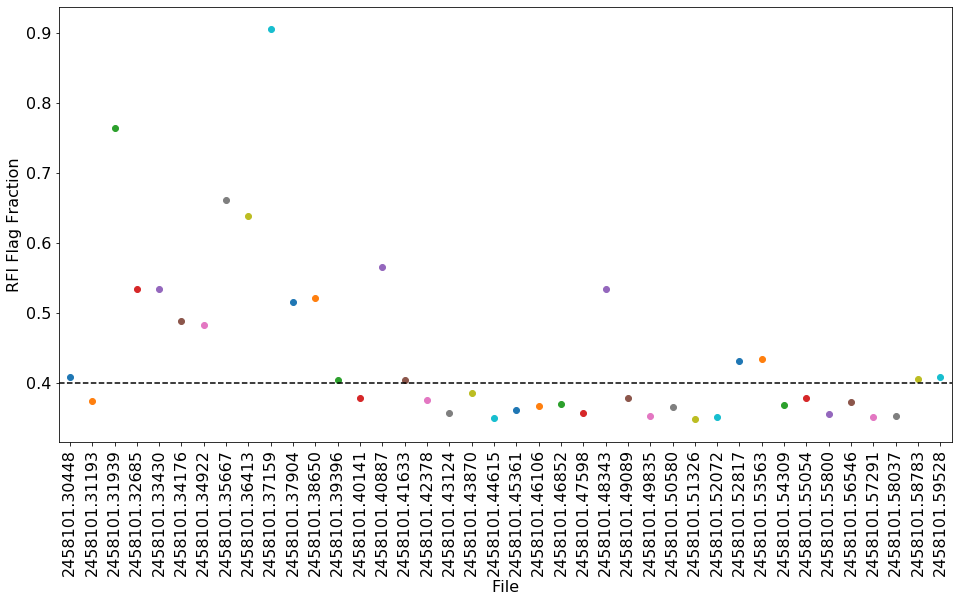

In [67]:
fig = figure(figsize=(16, 8))
for i, fn_key in enumerate(mean_fracs.keys()):
    scatter(i, mean_fracs[fn_key])
    
ax = gca()
ax.set_xticks(np.arange(0, i + 1))
xticklabels = [key[4:17] for key in mean_fracs.keys()]
hlines(0.4, -0.5, i + 0.5, linestyle='--')
ax.set_xlim(-0.5, i + 0.5)
ax.set_xticklabels(xticklabels, rotation=90)
ax.set_xlabel('File')
ax.set_ylabel('RFI Flag Fraction')
# ax.legend(loc='best', ncol=4)

In [68]:
files_to_use = []
for key in mean_fracs.keys():
    if mean_fracs[key] < 0.4:
        files_to_use.append(key)
print(len(files_to_use), files_to_use)

21 ['zen.2458101.31193.HH.OCRS.uvh5', 'zen.2458101.40141.HH.OCRS.uvh5', 'zen.2458101.42378.HH.OCRS.uvh5', 'zen.2458101.43124.HH.OCRS.uvh5', 'zen.2458101.43870.HH.OCRS.uvh5', 'zen.2458101.44615.HH.OCRS.uvh5', 'zen.2458101.45361.HH.OCRS.uvh5', 'zen.2458101.46106.HH.OCRS.uvh5', 'zen.2458101.46852.HH.OCRS.uvh5', 'zen.2458101.47598.HH.OCRS.uvh5', 'zen.2458101.49089.HH.OCRS.uvh5', 'zen.2458101.49835.HH.OCRS.uvh5', 'zen.2458101.50580.HH.OCRS.uvh5', 'zen.2458101.51326.HH.OCRS.uvh5', 'zen.2458101.52072.HH.OCRS.uvh5', 'zen.2458101.54309.HH.OCRS.uvh5', 'zen.2458101.55054.HH.OCRS.uvh5', 'zen.2458101.55800.HH.OCRS.uvh5', 'zen.2458101.56546.HH.OCRS.uvh5', 'zen.2458101.57291.HH.OCRS.uvh5', 'zen.2458101.58037.HH.OCRS.uvh5']
